In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection  import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import random
import numpy as np

In [2]:
seed = 123
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)
torch.cuda.manual_seed(seed)

# 1 Load and Process Data

In [3]:
# Download and preprocess the data
mnist = fetch_openml('mnist_784', version=1)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X, y = mnist.data, mnist.target.astype('int64')
X = ((X/255.)-.5)*2

In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=seed)


# Convert to PyTorch tensors and add a dimension to match the CNN input format
X_train_tensor = torch.from_numpy(X_train.values).reshape(-1, 1, 28, 28)
y_train_tensor = torch.from_numpy(y_train.values)
X_test_tensor = torch.from_numpy(X_test.values).reshape(-1, 1, 28, 28)
y_test_tensor = torch.from_numpy(y_test.values)
X_val_tensor = torch.from_numpy(X_val.values).reshape(-1, 1, 28, 28)
y_val_tensor = torch.from_numpy(y_val.values)



In [6]:
print("Train data num:{}".format(X_train.shape[0]))
print("Test data num: {}".format(X_test.shape[0]))
print("Val data num:  {}".format(X_val.shape[0]))

Train data num:56000
Test data num: 9800
Val data num:  4200


In [7]:
# Create datasets and data loaders
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 50
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

# 2 Create model

In [8]:
import torch.nn.functional as F

# Define the convolutional neural network model
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, stride=1)
        self.conv2 = nn.Conv2d(6, 10, 3, stride=1)

        self.fc1 = nn.Linear(5760, 30)  # 5x5 is the size after two max pooling layers
        self.fc2 = nn.Linear(30, 10)
        
        self.dropout = nn.Dropout(p=0.25)  

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        
        x = self.conv2(x)
        x = torch.relu(x)
        x = x.view(batch_size, -1)
        
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)  # Apply softmax along the dimension representing classes

        return x

In [9]:
import torch.nn.functional as F

# Define the convolutional neural network model
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, stride=1)
        self.conv2 = nn.Conv2d(6, 10, 3, stride=1)

        self.fc1 = nn.Linear(5760, 30)  # 5x5 is the size after two max pooling layers
        self.fc2 = nn.Linear(30, 10)
        
        self.dropout = nn.Dropout(p=0.5)  

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        
        x = self.conv2(x)
        x = torch.relu(x)
        x = x.view(batch_size, -1)
        
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)  # Apply softmax along the dimension representing classes

        return x

In [10]:
import torch.nn.functional as F

# Define the convolutional neural network model
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, stride=1)
        self.conv2 = nn.Conv2d(6, 10, 3, stride=1)

        self.fc1 = nn.Linear(5760, 30)  # 5x5 is the size after two max pooling layers
        self.fc2 = nn.Linear(30, 10)
        
        self.dropout = nn.Dropout(p=0.75)  

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        
        x = self.conv2(x)
        x = torch.relu(x)
        x = x.view(batch_size, -1)
        
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x

In [11]:
# Instantiate the model
model1 = CNN1()
model2 = CNN2()
model3 = CNN3()

# Xavier initialization
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)

model1.apply(weights_init)
model2.apply(weights_init)
model3.apply(weights_init)

CNN3(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 10, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=5760, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=10, bias=True)
  (dropout): Dropout(p=0.75, inplace=False)
)

# Train Model

In [16]:
num_epochs = 100
patience = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model1 = model1.to(device)
model2 = model2.to(device)
model3 = model3.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.05, momentum=0.9)
optimizer2 = optim.SGD(model2.parameters(), lr=0.05, momentum=0.9)
optimizer3 = optim.SGD(model3.parameters(), lr=0.05, momentum=0.9)

# Learning rate scheduler
scheduler1 = optim.lr_scheduler.StepLR(optimizer1, step_size=10, gamma=0.9)
scheduler2 = optim.lr_scheduler.StepLR(optimizer2, step_size=10, gamma=0.9)
scheduler3 = optim.lr_scheduler.StepLR(optimizer3, step_size=10, gamma=0.9)

best_valid_acc = 0.0
best_model = None


cuda


In [17]:
model_train_losses = []
model_valid_losses = []
model_train_accs = []
model_valid_accs = []


for d, model,optimizer,scheduler, in zip([0.25, 0.5, 0.75],
                                         [model1, model2, model3],
                                         [optimizer1,optimizer2,optimizer3],
                                        [scheduler1,scheduler2,scheduler3]):
    print("-----------dropout:{}------------------".format(d))
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []
    no_improvement= 0
    
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_acc = 0.0
        total= 0
        for inputs, labels in train_loader:
            inputs = inputs.float()
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            total += len(labels)

            _, predicted = torch.max(outputs, 1)
            train_acc += (predicted == labels).sum().item()

        train_loss /=  total
        train_acc /= total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        model.eval()
        valid_loss = 0.0
        valid_acc = 0.0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.float()
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)

                # loss
                valid_loss += criterion(outputs, labels).item()

                # acc
                valid_acc += (predicted == labels).sum().item()
                total += len(predicted)

        valid_loss /= total
        valid_acc /= total
        valid_losses.append(valid_loss)
        valid_accs.append(valid_acc)
        
        print("epoch：{} train loss:{:.4f}  train acc:{:.4f}  val loss: {:.4f} val acc: {:.4f} ".format(epoch, train_loss, train_acc, valid_loss, valid_acc))

        if valid_acc > best_valid_acc:
            best_valid_acc = valid_acc
            best_model = model
            no_improvement = 0
            best_dropout = d
        else:
            no_improvement += 1
            if no_improvement >= patience:
                print(f'Early stopping after {epoch+1} epochs')
                break

        scheduler.step()
        
    model_train_losses.append(train_losses)
    model_valid_losses.append(valid_losses)
    model_train_accs.append(train_accs)
    model_valid_accs.append(valid_accs)

-----------dropout:0.25------------------
epoch：0 train loss:0.0035  train acc:0.9485  val loss: 0.0023 val acc: 0.9705 
epoch：1 train loss:0.0030  train acc:0.9561  val loss: 0.0018 val acc: 0.9769 
epoch：2 train loss:0.0023  train acc:0.9648  val loss: 0.0033 val acc: 0.9543 
epoch：3 train loss:0.0023  train acc:0.9660  val loss: 0.0018 val acc: 0.9757 
epoch：4 train loss:0.0021  train acc:0.9680  val loss: 0.0020 val acc: 0.9724 
epoch：5 train loss:0.0021  train acc:0.9684  val loss: 0.0021 val acc: 0.9781 
epoch：6 train loss:0.0021  train acc:0.9677  val loss: 0.0020 val acc: 0.9783 
epoch：7 train loss:0.0020  train acc:0.9703  val loss: 0.0026 val acc: 0.9719 
epoch：8 train loss:0.0022  train acc:0.9686  val loss: 0.0024 val acc: 0.9748 
epoch：9 train loss:0.0019  train acc:0.9718  val loss: 0.0019 val acc: 0.9788 
epoch：10 train loss:0.0017  train acc:0.9741  val loss: 0.0022 val acc: 0.9745 
epoch：11 train loss:0.0014  train acc:0.9785  val loss: 0.0024 val acc: 0.9786 
epoch：12

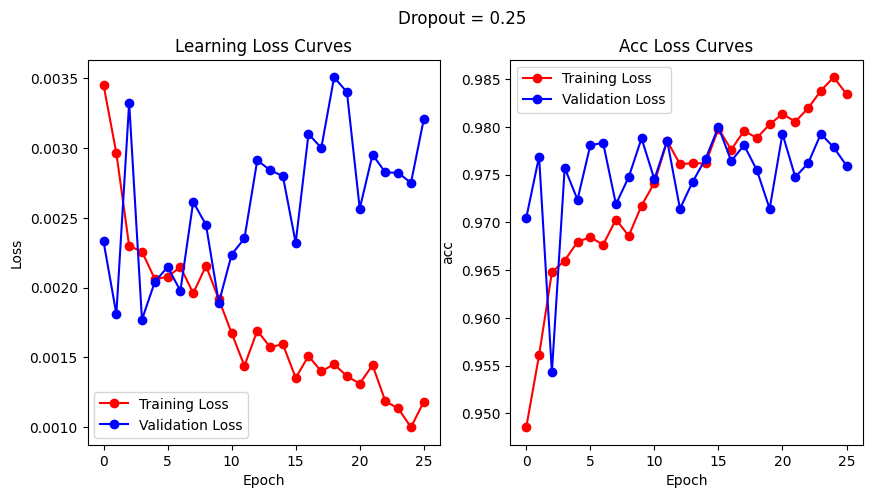

In [18]:
import matplotlib.pyplot as plt

# Plot loss  curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.plot(model_train_losses[0],'ro-', label='Training Loss')
plt.plot(model_valid_losses[0],'bo-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Loss Curves')


# Plot loss  curves
plt.subplot(1, 2, 2)  
plt.plot(model_train_accs[0],'ro-', label='Training Loss')
plt.plot(model_valid_accs[0],'bo-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend()
plt.title('Acc Loss Curves')
plt.suptitle('Dropout = 0.25')  

plt.show()

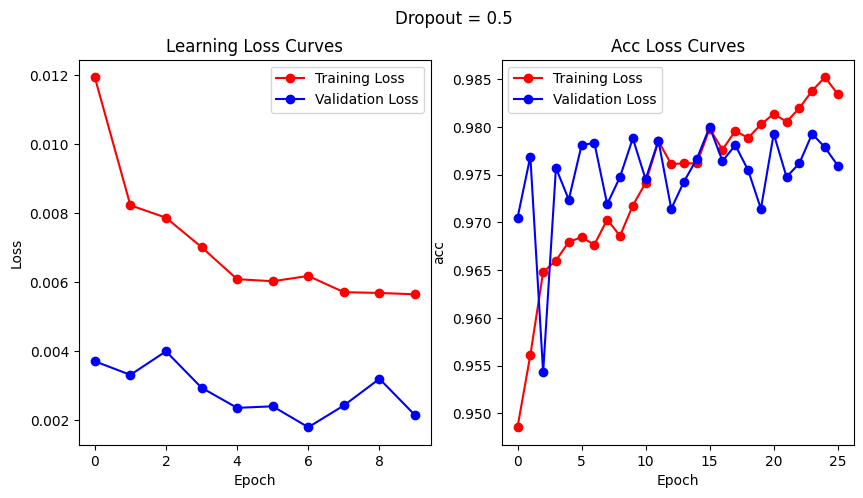

In [19]:
# Plot loss  curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.plot(model_train_losses[1],'ro-', label='Training Loss')
plt.plot(model_valid_losses[1],'bo-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Loss Curves')


# Plot loss  curves
plt.subplot(1, 2, 2)  
plt.plot(model_train_accs[0],'ro-', label='Training Loss')
plt.plot(model_valid_accs[0],'bo-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend()
plt.title('Acc Loss Curves')
plt.suptitle('Dropout = 0.5')
plt.show()

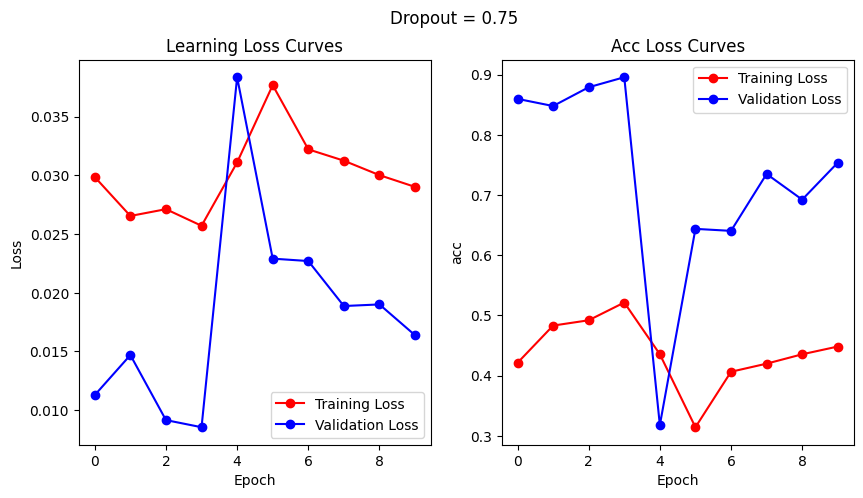

In [20]:
# Plot loss  curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.plot(model_train_losses[2],'ro-', label='Training Loss')
plt.plot(model_valid_losses[2],'bo-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Loss Curves')


# Plot loss  curves
plt.subplot(1, 2, 2)  
plt.plot(model_train_accs[2],'ro-', label='Training Loss')
plt.plot(model_valid_accs[2],'bo-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend()
plt.title('Acc Loss Curves')
plt.suptitle('Dropout = 0.75')
plt.show()

The larger the dropout, the more volatile the training results

# Test model

In [21]:
from sklearn.metrics import confusion_matrix

# Test the model
correct = 0
total = 0
predictions = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.float()
        inputs, labels = inputs.to(device), labels.to(device)
        

        outputs = best_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print(f"Test Data Acc : {(100 * correct / total):.2f}%")

Test Data Acc : 97.26%


In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 952    0    1    0    1    1    5    0    6    1]
 [   0 1136    2    1    0    0    1    6    6    0]
 [   3    4  908    0    2    0    0    6    7    3]
 [   2    0   15  949    0    7    2    6    7    4]
 [   1    1    2    0  938    0    6    0    5   31]
 [   4    1    0    8    1  873    8    0    6    7]
 [   0    1    0    0    3    1  917    0    7    0]
 [   0    5    6    2    3    0    0  936    1   10]
 [   3    0    5    1    2    2    4    0  990    4]
 [   1    1    1    0    9    3    0    6    8  932]]


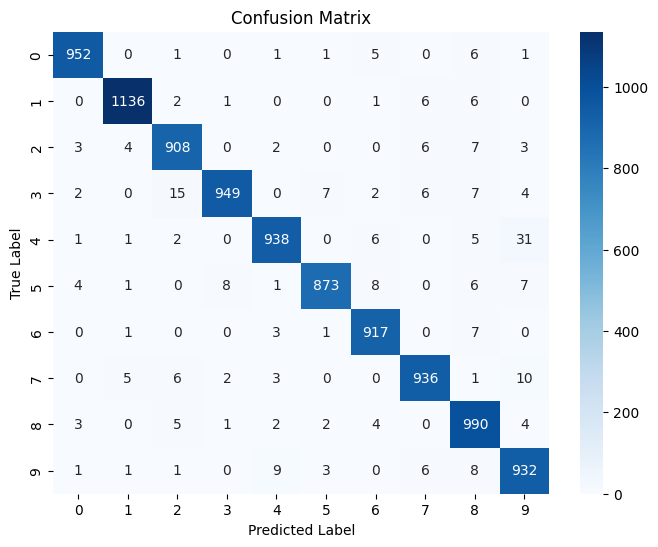

In [23]:
import seaborn as sns

classes = range(10) 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()